In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-05-13 12:46:46.530407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
btc = pd.read_csv('data_with_blockchain_Modified.csv')

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              1797 non-null   object 
 1   Open                              1797 non-null   float64
 2   High                              1797 non-null   float64
 3   Low                               1797 non-null   float64
 4   Close                             1797 non-null   float64
 5   Volume                            1797 non-null   float64
 6   Close Time                        1797 non-null   object 
 7   Quote Asset Volume                1797 non-null   float64
 8   Number of Trades                  1797 non-null   int64  
 9   TB Base Volume                    1797 non-null   float64
 10  TB Quote Volume                   1797 non-null   float64
 11  Ignore                            1797 non-null   int64  
 12  hash-r

In [4]:
btc.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,...,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap
0,2022-03-20,42201.13,42296.26,40911.00,41262.11,30653.33468,2022-03-20 23:59:59.999000064,1.273881e+09,799695,14636.72662,...,18989068.75,191.636395,396509.664403,4.034847e+07,6.458944,1367.188312,210547.0,3.136534,1.286403e+09,7.950917e+11
1,2022-03-20,42201.13,42296.26,40911.00,41262.11,30653.33468,2022-03-20 23:59:59.999000064,1.273881e+09,799695,14636.72662,...,18989068.75,191.636395,396509.664403,4.034847e+07,6.458944,1367.188312,210547.0,3.136534,1.286403e+09,7.830712e+11
2,2022-03-21,41262.11,41544.22,40467.94,41002.25,39426.24877,2022-03-21 23:59:59.999000064,1.618790e+09,947206,19079.42652,...,18989512.50,152.780582,396644.967374,3.970951e+07,9.490092,1698.771242,259912.0,0.631079,6.292318e+09,7.761773e+11
3,2022-03-21,41262.11,41544.22,40467.94,41002.25,39426.24877,2022-03-21 23:59:59.999000064,1.618790e+09,947206,19079.42652,...,18989512.50,152.780582,396644.967374,3.970951e+07,9.490092,1698.771242,259912.0,0.631079,6.292318e+09,7.776387e+11
4,2022-03-21,41262.11,41544.22,40467.94,41002.25,39426.24877,2022-03-21 23:59:59.999000064,1.618790e+09,947206,19079.42652,...,18989956.25,152.780582,396644.967374,3.970951e+07,9.490092,1698.771242,259912.0,0.631079,6.292318e+09,7.761773e+11


In [5]:
btc.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'Number of Trades', 'TB Base Volume',
       'TB Quote Volume', 'Ignore', 'hash-rate', 'market-price', 'difficulty',
       'avg-block-size', 'total-bitcoins', 'cost-per-transaction',
       'blocks-size', 'miners-revenue', 'transaction-fees',
       'n-transactions-per-block', 'n-transactions',
       'cost-per-transaction-percent', 'estimated-transaction-volume-usd',
       'market-cap'],
      dtype='object')

In [6]:
btc.drop(['hash-rate','avg-block-size','cost-per-transaction','transaction-fees','n-transactions-per-block',
          'n-transactions','cost-per-transaction-percent','estimated-transaction-volume-usd','Volume','Close Time',
          'Quote Asset Volume','TB Base Volume','TB Quote Volume'],axis=1,inplace=True)
btc

,date,Open,High,Low,Close,Number of Trades,Ignore,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap
0,2022-03-20,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.950917e+11
1,2022-03-20,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.830712e+11
2,2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.761773e+11
3,2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.776387e+11
4,2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989956.25,396644.967374,3.970951e+07,7.761773e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2023-04-30,29230.45,29969.39,29079.59,29233.21,949458,0,29244.68,4.871241e+13,19360087.50,477020.414884,2.854803e+07,5.676184e+11
1793,2023-04-30,29230.45,29969.39,29079.59,29233.21,949458,0,29244.68,4.871241e+13,19360087.50,477020.414884,2.854803e+07,5.688511e+11
1794,2023-04-30,29230.45,29969.39,29079.59,29233.21,949458,0,29244.68,4.871241e+13,19360531.25,477020.414884,2.854803e+07,5.661534e+11
1795,2023-04-30,29230.45,29969.39,29079.59,29233.21,949458,0,29244.68,4.871241e+13,19360531.25,477020.414884,2.854803e+07,5.676184e+11


In [7]:
target = btc['market-price'].values

In [8]:
btc.set_index('date', inplace=True)
btc.head()

,Open,High,Low,Close,Number of Trades,Ignore,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap
date,,,,,,,,,,,,
2022-03-20,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.950917e+11
2022-03-20,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.830712e+11
2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.761773e+11
2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.776387e+11
2022-03-21,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989956.25,396644.967374,3.970951e+07,7.761773e+11


In [9]:
btc = btc.reset_index(drop=True)
btc.head()

,Open,High,Low,Close,Number of Trades,Ignore,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap
0,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.950917e+11
1,42201.13,42296.26,40911.00,41262.11,799695,0,42222.32,2.745271e+13,18989068.75,396509.664403,4.034847e+07,7.830712e+11
2,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.761773e+11
3,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989512.50,396644.967374,3.970951e+07,7.776387e+11
4,41262.11,41544.22,40467.94,41002.25,947206,0,41250.83,2.745271e+13,18989956.25,396644.967374,3.970951e+07,7.761773e+11


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc)
btc_scaled

array([[0.83465778, 0.81510244, 0.80810552, ..., 0.        , 0.80894768,
        0.81466049],
       [0.83465778, 0.81510244, 0.80810552, ..., 0.        , 0.80894768,
        0.7947649 ],
       [0.80499218, 0.79150891, 0.79402888, ..., 0.00168056, 0.79197961,
        0.78335456],
       ...,
       [0.42488698, 0.42837517, 0.43220508, ..., 1.        , 0.4955786 ,
        0.43573557],
       [0.42488698, 0.42837517, 0.43220508, ..., 1.        , 0.4955786 ,
        0.43816032],
       [0.42488698, 0.42837517, 0.43220508, ..., 1.        , 0.4955786 ,
        0.44020065]])

In [11]:
btc_scaled_df = pd.DataFrame(btc_scaled, columns=btc.columns)
btc_scaled_df

,Open,High,Low,Close,Number of Trades,Ignore,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap
0,0.834658,0.815102,0.808106,0.804992,0.025422,0.0,0.835091,0.0,0.000000,0.000000,0.808948,0.814660
1,0.834658,0.815102,0.808106,0.804992,0.025422,0.0,0.835091,0.0,0.000000,0.000000,0.808948,0.794765
2,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.0,0.001195,0.001681,0.791980,0.783355
3,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.0,0.001195,0.001681,0.791980,0.785773
4,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.0,0.002389,0.001681,0.791980,0.783355
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.424887,0.428375,0.432205,0.424974,0.035541,0.0,0.425552,1.0,0.998805,1.000000,0.495579,0.438160
1793,0.424887,0.428375,0.432205,0.424974,0.035541,0.0,0.425552,1.0,0.998805,1.000000,0.495579,0.440201
1794,0.424887,0.428375,0.432205,0.424974,0.035541,0.0,0.425552,1.0,1.000000,1.000000,0.495579,0.435736
1795,0.424887,0.428375,0.432205,0.424974,0.035541,0.0,0.425552,1.0,1.000000,1.000000,0.495579,0.438160


In [12]:
# seq_len = 1
# train_size = int(len(btc_scaled_df) * 0.9)
# train_data = btc_scaled_df.iloc[:train_size]
# test_data = btc_scaled_df.iloc[train_size:]
#data should not be shuffled so as not to interfere with the 1 day lag 
train_data, test_data = train_test_split(btc_scaled_df, test_size=0.1, shuffle=False) 

In [13]:
def create_dataset(data, time_steps):
    print(f"Input data type: {type(data)}")
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        x = data[i:(i + time_steps), 1:]
        y = data[i + time_steps, 0] # Assuming the target variable (e.g. closing price) is the first column
        print(f"i: {i}, x shape: {x.shape}, y: {y}")
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [14]:
# def create_sequences(data, seq_len):
#     if len(data) < seq_len:
#         raise ValueError("Length of data is less than sequence length")
#     X = []
#     y = []
#     for i in range(seq_len, len(data)):
#         X.append(data.iloc[i-seq_len:i].values)
#         y.append(data.iloc[i].values)
#     X = np.array(X)
#     y = np.array(y)
#     return X, y

In [15]:
# input_cols = ['open', 'high', 'low', 'close',]
# X_train, y_train = create_sequences(train_data[input_cols], seq_len)
# X_test, y_test = create_sequences(test_data[input_cols], seq_len)

In [16]:
time_steps = 5 # Adjust this value depending on the desired sequence length
X_train, Y_train = create_dataset(train_data.values, time_steps)
X_test, Y_test = create_dataset(test_data.values, time_steps)

Input data type: <class 'numpy.ndarray'>
i: 0, x shape: (5, 12), y: 0.8049921809594514
i: 1, x shape: (5, 12), y: 0.7967829781856666
i: 2, x shape: (5, 12), y: 0.7967829781856666
i: 3, x shape: (5, 12), y: 0.7967829781856666
i: 4, x shape: (5, 12), y: 0.7967829781856666
i: 5, x shape: (5, 12), y: 0.8398072882935534
i: 6, x shape: (5, 12), y: 0.8398072882935534
i: 7, x shape: (5, 12), y: 0.8398072882935534
i: 8, x shape: (5, 12), y: 0.8398072882935534
i: 9, x shape: (5, 12), y: 0.8561918903122876
i: 10, x shape: (5, 12), y: 0.8561918903122876
i: 11, x shape: (5, 12), y: 0.8561918903122876
i: 12, x shape: (5, 12), y: 0.8561918903122876
i: 13, x shape: (5, 12), y: 0.89121803276099
i: 14, x shape: (5, 12), y: 0.89121803276099
i: 15, x shape: (5, 12), y: 0.89121803276099
i: 16, x shape: (5, 12), y: 0.89121803276099
i: 17, x shape: (5, 12), y: 0.901381205869809
i: 18, x shape: (5, 12), y: 0.901381205869809
i: 19, x shape: (5, 12), y: 0.901381205869809
i: 20, x shape: (5, 12), y: 0.9013812058

In [17]:
train_data

,Open,High,Low,Close,Number of Trades,Ignore,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap
0,0.834658,0.815102,0.808106,0.804992,0.025422,0.0,0.835091,0.000000,0.000000,0.000000,0.808948,0.814660
1,0.834658,0.815102,0.808106,0.804992,0.025422,0.0,0.835091,0.000000,0.000000,0.000000,0.808948,0.794765
2,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.000000,0.001195,0.001681,0.791980,0.783355
3,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.000000,0.001195,0.001681,0.791980,0.785773
4,0.804992,0.791509,0.794029,0.796782,0.035389,0.0,0.804434,0.000000,0.002389,0.001681,0.791980,0.783355
...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.385157,0.381398,0.370088,0.377074,0.767054,0.0,0.387720,0.757255,0.898156,0.860883,0.471141,0.389301
1613,0.385157,0.381398,0.370088,0.377074,0.767054,0.0,0.387720,0.757255,0.898156,0.860883,0.471141,0.393863
1614,0.385157,0.381398,0.370088,0.377074,0.767054,0.0,0.387720,0.757255,0.899351,0.860883,0.471141,0.397595
1615,0.385157,0.381398,0.370088,0.377074,0.767054,0.0,0.387720,0.757255,0.899351,0.860883,0.471141,0.389301


In [18]:
print(X_train.shape, Y_train.shape)

(1611, 5, 12) (1611,)


In [19]:
print(X_test.shape, Y_test.shape)

(174, 5, 12) (174,)


In [20]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the function to create the LSTM model
# def create_model(optimizer='adam', units1=128, units2=64):
#     model = Sequential()
#     model.add(LSTM(units=units1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(LSTM(units=units2, return_sequences=True))
#     model.add(LSTM(units=64))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Create the KerasRegressor object
# model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# # Define the hyperparameters to search over
# param_grid = {
#     'optimizer': ['adamax', 'rmsprop', 'adam', 'sgd', 'nadam'],
#     'units1': [64, 128, 256],
#     'units2': [32, 64, 128]
#     #'epochs':[2, 4, 16, 32, 64, 72, 128]
# }

# # Create the GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

# # Fit the GridSearchCV object to the data
# grid_result = grid.fit(X_train, Y_train)

# # Print the results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_2306/1358354377.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.000496 using {'optimizer': 'adam', 'units1': 256, 'units2': 64}


In [ ]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
51/51 [==============================] - 3s 7ms/step - loss: 0.0172
Epoch 2/15
51/51 [==============================] - 0s 7ms/step - loss: 5.3876e-04
Epoch 3/15
51/51 [==============================] - 0s 7ms/step - loss: 2.9815e-04
Epoch 4/15
51/51 [==============================] - 0s 7ms/step - loss: 2.9159e-04
Epoch 5/15
51/51 [==============================] - 0s 7ms/step - loss: 3.0514e-04
Epoch 6/15
51/51 [==============================] - 0s 7ms/step - loss: 2.6061e-04
Epoch 7/15
51/51 [==============================] - 0s 7ms/step - loss: 2.6523e-04
Epoch 8/15
51/51 [==============================] - 0s 7ms/step - loss: 2.4092e-04
Epoch 9/15
51/51 [==============================] - 0s 7ms/step - loss: 2.1609e-04
Epoch 10/15
51/51 [==============================] - 0s 7ms/step - loss: 2.9382e-04
Epoch 11/15
51/51 [==============================] - 0s 7ms/step - loss: 3.9235e-04
Epoch 12/15
51/51 [==============================] - 0s 7ms/step - loss: 2.3774e-04
Epoch

In [22]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
# Compute the mean squared error between the predictions and the actual values
test_loss = mean_squared_error(Y_test, y_pred)

# Print the test loss
print("Test loss:", test_loss)

Test loss: 0.000740724555734598


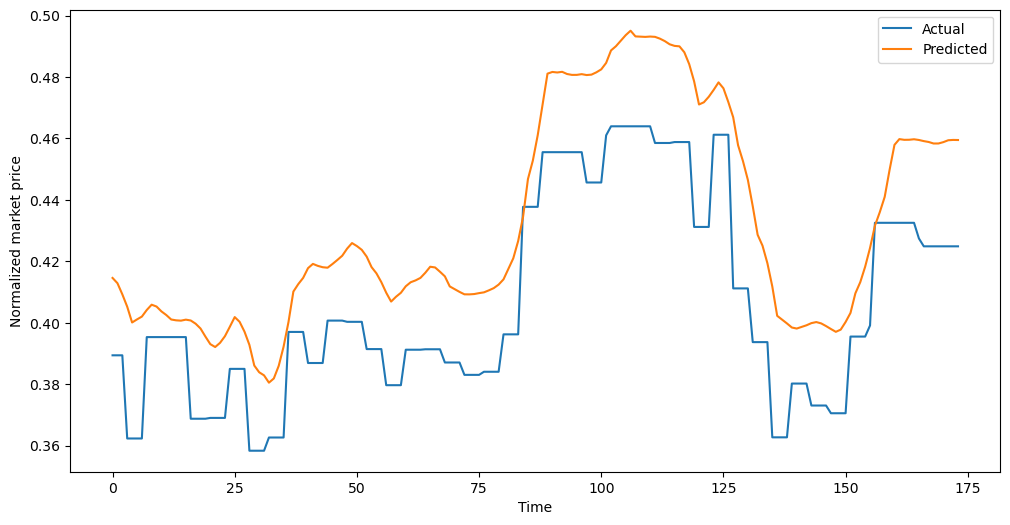

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.show()